In [0]:
pip install xgboost

Python interpreter will be restarted.
  Using cached xgboost-1.6.2-py3-none-manylinux2014_x86_64.whl (255.9 MB)
Python interpreter will be restarted.


In [0]:
# General imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random
from random import sample

# Data processing
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit

In [0]:
# Models
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import HistGradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score,average_precision_score,classification_report,roc_auc_score

#load data

In [0]:
readme=pd.read_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/readme.csv')
readme

,Variable,Description
0,candidate_id,Unique ID for each applicant
1,application_status,"Application Status. ""Hired"" indicates a succes..."
2,number_of_employees_log,Log of the number of employees at given company
3,occupation_id,Unique ID for each role.
4,company_id,Unique ID for each company
5,occupation_skill_1_count,Count of skills associated with attribute for ...
6,occupation_skill_2_count,Count of skills associated with attribute for ...
7,occupation_skill_3_count,Count of skills associated with attribute for ...
8,occupation_skill_4_count,Count of skills associated with attribute for ...
9,occupation_skill_5_count,Count of skills associated with attribute for ...


In [0]:
data=pd.read_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/data.csv')
print(data.shape)
data.head()

(50000, 60)


,candidate_id,application_status,number_of_employees_log,occupation_id,company_id,occupation_skill_1_count,occupation_skill_2_count,occupation_skill_3_count,occupation_skill_4_count,occupation_skill_5_count,...,candidate_skill_2_count,candidate_skill_3_count,candidate_skill_4_count,candidate_skill_5_count,candidate_skill_6_count,candidate_skill_7_count,candidate_skill_8_count,candidate_skill_9_count,candidate_relative_test_1,candidate_relative_test_2
0,bgjikcrozdgkrtzigymnaylpypxxublc0,interview,2.0,exvwhbxlejsfyqxnwjabksnntpwodfhr0,xuemjhkyskdkwxlfbykrvkrffvpoepid0,1.0,0.0,0.0,1.0,0.0,...,7.0,2.0,8.0,12.0,0.0,9.0,4.0,6.0,0.600274,0.348715
1,pgvjmzqyjgzmbgqetvzteeejufcexbur1,interview,1.0,jpegpbxvbsjbkwmahpbvcdbxzcdjmack1,ndahnrikmemhkgwgsrfoaazzkszfntja1,0.0,0.0,0.0,1.0,1.0,...,NaN,0.0,4.0,10.0,5.0,1.0,3.0,0.0,0.759273,0.972119
2,snzyhcbqkbtiydfxcxhpcyzuirxzpxcx2,interview,1.0,czwkhxbmdopwdiuufvsxtahuqnifojgl2,xzlecjjnxynakiohuqudeusnnrzlrivp2,0.0,1.0,NaN,0.0,1.0,...,4.0,7.0,4.0,NaN,2.0,NaN,6.0,1.0,0.664639,0.597499
3,tbugkzlvhnkjkgzclndonrcusetoygmc3,hired,4.0,aeuvpjqtkaeeqghymzriuvoyqfzikhwq3,hxxnjooagjshdqeioibhovqqggztvbaw3,NaN,NaN,NaN,NaN,0.0,...,5.0,7.0,0.0,3.0,1.0,8.0,0.0,NaN,0.622446,0.569189
4,fxhprrcbbbqkuidxmjcahezgljgnxbte4,hired,4.0,iyejtuewotamjissxrmlncpoteqyqvdk4,tqjeojjlpmnmnnoxyrewiacjzipaawpm4,0.0,NaN,NaN,0.0,NaN,...,6.0,NaN,8.0,NaN,1.0,1.0,10.0,4.0,0.493108,0.708251


# data cleaning

In [0]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res) 

In [0]:
clean_df=data.copy()
labels = clean_df['application_status']
labels[labels != 'hired'] = 0
labels[labels == 'hired'] = 1
labels = labels.astype(int)

features_to_drop = ['application_status', 'candidate_id', 'occupation_id', 'company_id', 'application_attribute_1']
clean_df = clean_df.drop(features_to_drop, axis=1)

feature_names = np.array(clean_df.keys().to_list())

<command-3693777951623855>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[labels != 'hired'] = 0
<command-3693777951623855>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  labels[labels == 'hired'] = 1


In [0]:
encode_df = clean_df.copy()
features_to_encode=['gender','ethnicity','candidate_demographic_variable_5']
for feature in features_to_encode:
    encode_df = encode_and_bind(encode_df, feature)

data = encode_df.values
data = np.nan_to_num(data.astype(float))

# split data

In [0]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.005, random_state=0)
for train_index, test_index in sss.split(data, labels):
    X_train, Y_train = data[train_index], labels[train_index]
    X_test, Y_test = data[test_index], labels[test_index]

# model: unit test

In [0]:
# model = LogisticRegression(random_state=0).fit(train_data, train_labels)
# model = HistGradientBoostingClassifier().fit(train_data, train_labels)
model = XGBClassifier().fit(X_train, Y_train)

In [0]:
f1 = f1_score(Y_test,y_pred, pos_label = 1)
acc = accuracy_score(Y_test,y_pred)
print(f'Accuracy = {acc%100:.2f}%. F1-score = {f1:.4f}. AUC_ROC = {auc_roc:.4f}')

Accuracy = 0.87%. F1-score = 0.7591. AUC_ROC = 0.8162


In [0]:
print(confusion_matrix(Y_test,y_pred))
print(classification_report(Y_test,y_pred))

[[33  2]
 [ 6  9]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89        35
           1       0.82      0.60      0.69        15

    accuracy                           0.84        50
   macro avg       0.83      0.77      0.79        50
weighted avg       0.84      0.84      0.83        50



#Introduce randomness by withdrawing features

## predict

In [0]:
def predict(clean_df,feature_names):
    
  
    # prints a random value from the list
    fnumber = list(np.arange(len(feature_names)))
    feature_to_mask = feature_names[random.choice(fnumber)]
    
    encode_df = clean_df.copy()
    encode_df = encode_df.drop(feature_to_mask, axis=1)

    features_to_encode=['gender','ethnicity','candidate_demographic_variable_5']
    for feature in features_to_encode:
        if feature == feature_to_mask:
            continue
        encode_df = encode_and_bind(encode_df, feature)
    
    data = encode_df.values
    data = np.nan_to_num(data.astype(float))

    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.005, random_state=0)
    for train_index, test_index in sss.split(data, labels):
        X_train, Y_train = data[train_index], labels[train_index]
        X_test, Y_test = data[test_index], labels[test_index]


    model = XGBClassifier().fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    f1 = f1_score(Y_test,y_pred, pos_label = 1)
    acc = accuracy_score(Y_test,y_pred)
    auc_roc = roc_auc_score(Y_test,y_pred)
    
    predict_outcome.loc[:,feature_to_mask]=y_pred
    evaluation_outcome.loc['Accuracy',feature_to_mask]=acc
    evaluation_outcome.loc['F1',feature_to_mask]=f1
    evaluation_outcome.loc['AUC_ROC',feature_to_mask]=auc_roc

    print(f'Masking feature {i_feature}. Accuracy = {acc%100:.2f}%. F1-score = {f1:.4f}. AUC_ROC = {auc_roc:.4f}')

In [0]:
predict(clean_df,feature_names)

Masking feature 54. Accuracy = 0.88%. F1-score = 0.7972. AUC_ROC = 0.8463


## Systematicity

In [0]:
predict_outcome=pd.DataFrame(columns=feature_names,index=np.array(range(len(Y_test))))
evaluation_outcome=pd.DataFrame(columns=feature_names,index=['Accuracy','F1','AUC_ROC'])

In [0]:
for i_feature, feature_to_mask in enumerate(feature_names):
    encode_df = clean_df.copy()
    encode_df = encode_df.drop(feature_to_mask, axis=1)

    features_to_encode=['gender','ethnicity','candidate_demographic_variable_5']
    for feature in features_to_encode:
        if feature == feature_to_mask:
            continue
        encode_df = encode_and_bind(encode_df, feature)

    data = encode_df.values
    data = np.nan_to_num(data.astype(float))
    for train_index, test_index in sss.split(data, labels):
        X_train, Y_train = data[train_index], labels[train_index]
        X_test, Y_test = data[test_index], labels[test_index]


    model = XGBClassifier().fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    f1 = f1_score(Y_test,y_pred, pos_label = 1)
    acc = accuracy_score(Y_test,y_pred)
    auc_roc = roc_auc_score(Y_test,y_pred)
    
    predict_outcome.loc[:,feature_to_mask]=y_pred
    evaluation_outcome.loc['Accuracy',feature_to_mask]=acc
    evaluation_outcome.loc['F1',feature_to_mask]=f1
    evaluation_outcome.loc['AUC_ROC',feature_to_mask]=auc_roc

#     print(f'Masking feature {i_feature}. Accuracy = {acc%100:.2f}%. F1-score = {f1:.4f}')

In [0]:
predict_outcome.to_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/feature_predict_outcome.csv')
evaluation_outcome.to_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/feature_evaluation_outcome.csv')

## Evaluation

In [0]:
evaluation_outcome
print(min(evaluation_outcome.loc['Accuracy',:]))
print(np.mean(evaluation_outcome.loc['Accuracy',:]))
print(np.mean(evaluation_outcome.loc['F1',:]))
print(np.mean(evaluation_outcome.loc['AUC_ROC',:]))

0.676
0.8573090909090907
0.7403761360504582
0.8080239784414015


In [0]:
all_wrong=list()
all_right=list()
for i_result, result in enumerate(Y_test):
    if abs(result-np.mean(predict_outcome.loc[i_result,:]))==1:
        all_wrong.append(i_result)
    elif abs(result-np.mean(predict_outcome.loc[i_result,:]))==0:
        all_right.append(i_result)

In [0]:
# number of prediction who were consistently wrong for all models
print((len(all_wrong)/len(Y_test)))

# number of prediction who were consistently right for all models
print((len(all_right)/len(Y_test)))

0.048
0.508


In [0]:
Y_test.index=predict_outcome.index
hired_accuracy=pd.DataFrame(columns=Y_test[Y_test==1].index,index=['mean_prediction'])
for i in Y_test[Y_test==1].index.to_list():
    hired_accuracy.loc['mean_prediction',i]=np.mean(predict_outcome.loc[i,:])

Out[102]: (array([14.,  3.,  2.,  0.,  5.,  3.,  0.,  1.,  5., 43.]),
 array([0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001,
        0.7000000000000001, 0.8, 0.9, 1.0], dtype=object),
 <BarContainer object of 10 artists>)

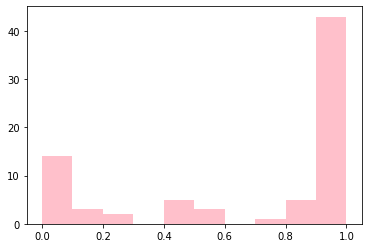

In [0]:
plt.hist(hired_accuracy.loc['mean_prediction',:].values,color='pink')

4.8% percent of hired population were wrongly predicted by all models. 50.8% of hired population were correctly predicted all the time.

#Introduce randomness by withdrawing 10% of traning data

## predict

In [0]:
def predict(clean_df,feature_names):
    
    encode_df = clean_df.copy()
    encode_df = encode_df.drop(feature_to_mask, axis=1)

    encode_df = clean_df.copy()
    features_to_encode=['gender','ethnicity','candidate_demographic_variable_5']
    for feature in features_to_encode:
        encode_df = encode_and_bind(encode_df, feature)

    data = encode_df.values
    data = np.nan_to_num(data.astype(float))

    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.005, random_state=0)
    for train_index, test_index in sss.split(data, labels):
        X_train, Y_train = data[train_index], labels[train_index]
        X_test, Y_test = data[test_index], labels[test_index]
    Y_train=pd.DataFrame(Y_train)
    X_train=pd.DataFrame(X_train)
    Y_train.index=X_train.index

    
    # sample 90% of training data 
    n_employee=int(X_train.shape[0]*0.9)
    employee_list=list(X_train.index)
    sampled_emp=random.sample(employee_list,n_employee)
    X_train, Y_train = X_train.loc[sampled_emp,:], Y_train.loc[sampled_emp,:]

    model = XGBClassifier().fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    f1 = f1_score(Y_test,y_pred, pos_label = 1)
    acc = accuracy_score(Y_test,y_pred)
    auc_roc = roc_auc_score(Y_test,y_pred)
    
    predict_outcome.loc[:,feature_to_mask]=y_pred
    evaluation_outcome.loc['Accuracy',feature_to_mask]=acc
    evaluation_outcome.loc['F1',feature_to_mask]=f1
    evaluation_outcome.loc['AUC_ROC',feature_to_mask]=auc_roc

    print(f'Masking feature {i_feature}. Accuracy = {acc%100:.2f}%. F1-score = {f1:.4f}. AUC_ROC = {auc_roc:.4f}')

In [0]:
predict(clean_df,feature_names)

Masking feature 54. Accuracy = 0.86%. F1-score = 0.7500. AUC_ROC = 0.8097


## Systematicity

In [0]:
predict_outcome=pd.DataFrame(columns=np.arange(10),index=np.array(range(len(Y_test))))
evaluation_outcome=pd.DataFrame(columns=np.arange(10),index=['Accuracy','F1','AUC_ROC'])

In [0]:
for i in range(10):
    encode_df = clean_df.copy()
    encode_df = encode_df.drop(feature_to_mask, axis=1)

    encode_df = clean_df.copy()
    features_to_encode=['gender','ethnicity','candidate_demographic_variable_5']
    for feature in features_to_encode:
        encode_df = encode_and_bind(encode_df, feature)

    data = encode_df.values
    data = np.nan_to_num(data.astype(float))

    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.005, random_state=0)
    for train_index, test_index in sss.split(data, labels):
        X_train, Y_train = data[train_index], labels[train_index]
        X_test, Y_test = data[test_index], labels[test_index]
    Y_train=pd.DataFrame(Y_train)
    X_train=pd.DataFrame(X_train)
    Y_train.index=X_train.index

    
    # sample 90% of training data 
    n_employee=int(X_train.shape[0])
    sampled_emp=np.arange(int(n_employee*i/10),int(n_employee*(i+1)/10),1)

    X_train, Y_train = X_train.loc[sampled_emp,:], Y_train.loc[sampled_emp,:]

    model = XGBClassifier().fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    f1 = f1_score(Y_test,y_pred, pos_label = 1)
    acc = accuracy_score(Y_test,y_pred)
    auc_roc = roc_auc_score(Y_test,y_pred)
    
    predict_outcome.loc[:,i]=y_pred
    evaluation_outcome.loc['Accuracy',i]=acc
    evaluation_outcome.loc['F1',i]=f1
    evaluation_outcome.loc['AUC_ROC',i]=auc_roc

In [0]:
evaluation_outcome

,0,1,2,3,4,5,6,7,8,9
Accuracy,0.776,0.792,0.836,0.816,0.812,0.816,0.796,0.788,0.796,0.816
F1,0.569231,0.617647,0.691729,0.651515,0.641221,0.640625,0.616541,0.59542,0.622222,0.646154
AUC_ROC,0.69457,0.724592,0.771022,0.745538,0.738959,0.738128,0.72376,0.710602,0.727465,0.741833


In [0]:
predict_outcome.to_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/employee_predict_outcome.csv')
evaluation_outcome.to_csv('/dbfs/mnt/client-002sap21p010-pasca/04_data_analysis/trial/employee_evaluation_outcome.csv')

##Evaluation

In [0]:
evaluation_outcome
print(min(evaluation_outcome.loc['Accuracy',:]))
print(np.mean(evaluation_outcome.loc['Accuracy',:]))
print(np.mean(evaluation_outcome.loc['F1',:]))
print(np.mean(evaluation_outcome.loc['AUC_ROC',:]))

0.776
0.8044
0.6292305946011295
0.731647005444646


In [0]:
all_wrong=list()
all_right=list()
for i_result, result in enumerate(Y_test):
    if abs(result-np.mean(predict_outcome.loc[i_result,:]))==1:
        all_wrong.append(i_result)
    elif abs(result-np.mean(predict_outcome.loc[i_result,:]))==0:
        all_right.append(i_result)
        
# number of prediction who were consistently wrong for all models
print((len(all_wrong)/len(Y_test)))

# number of prediction who were consistently right for all models
print((len(all_right)/len(Y_test)))

0.056
0.544


Out[233]: (array([14.,  4.,  9.,  0.,  3., 13.,  4.,  0.,  2., 27.]),
 array([0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001,
        0.7000000000000001, 0.8, 0.9, 1.0], dtype=object),
 <BarContainer object of 10 artists>)

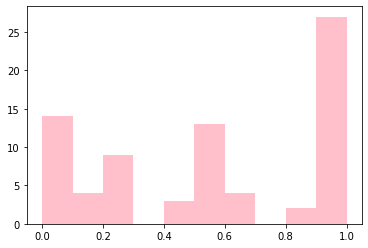

In [0]:
Y_test.index=predict_outcome.index
hired_accuracy=pd.DataFrame(columns=Y_test[Y_test==1].index,index=['mean_prediction'])
for i in Y_test[Y_test==1].index.to_list():
    hired_accuracy.loc['mean_prediction',i]=np.mean(predict_outcome.loc[i,:])
plt.hist(hired_accuracy.loc['mean_prediction',:].values,color='pink')

5.6% percent of hired population were wrongly predicted by all models. 54.4% of hired population were correctly predicted all the time.